In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
df = pd.read_csv('re.csv')
df.head()

C:\Users\Dell\AppData\Local\Temp/ipykernel_11332/541360841.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('re.csv')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


In [6]:
df1 = df[['state','so2','no2','rspm','spm']]
df1.head()

,state,so2,no2,rspm,spm
0,Andhra Pradesh,4.8,17.4,NaN,NaN
1,Andhra Pradesh,3.1,7.0,NaN,NaN
2,Andhra Pradesh,6.2,28.5,NaN,NaN
3,Andhra Pradesh,6.3,14.7,NaN,NaN
4,Andhra Pradesh,4.7,7.5,NaN,NaN


In [7]:
df1.isnull().sum()

state         0
so2       34646
no2       16233
rspm      40222
spm      237387
dtype: int64

In [8]:
 df1['rspm'].mean()

108.83278418538409

In [9]:
df1['so2'].mean()

10.829414322672587

In [10]:
df1['no2'].mean()

25.80962289781126

In [14]:
df1['rspm'] = df1['rspm'].fillna(0)
df1['spm'] = df1['spm'].fillna(0)
df1['so2'] = df1['so2'].fillna(0)
df1['no2'] = df1['no2'].fillna(0)
df1.isnull().sum()

C:\Users\Dell\AppData\Local\Temp/ipykernel_4636/807594747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rspm'] = df1['rspm'].fillna(0)
C:\Users\Dell\AppData\Local\Temp/ipykernel_4636/807594747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['spm'] = df1['spm'].fillna(0)
C:\Users\Dell\AppData\Local\Temp/ipykernel_4636/807594747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

state    0
so2      0
no2      0
rspm     0
spm      0
dtype: int64

In [11]:
df1.describe()

,so2,no2,rspm,spm
count,401096.000000,419509.000000,395520.000000,198355.000000
mean,10.829414,25.809623,108.832784,220.783480
std,11.177187,18.503086,74.872430,151.395457
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,14.000000,56.000000,111.000000
50%,8.000000,22.000000,90.000000,187.000000
75%,13.700000,32.200000,142.000000,296.000000
max,909.000000,876.000000,6307.033333,3380.000000


In [12]:
q1 = df1['so2'].quantile(0.25)
q3 = df1['so2'].quantile(0.75)
IQR = q3-q1
low = q1 - 1.5*IQR
up = q3 + 1.5*IQR
df2 = df1[(df1['so2'] >= low) & (df1['so2'] <= up)]
df2.describe()

,so2,no2,rspm,spm
count,377903.000000,375967.000000,348751.000000,159256.000000
mean,8.964262,25.089591,108.737265,222.392582
std,5.827525,17.114186,74.491193,151.336028
min,0.000000,0.000000,0.000000,0.000000
25%,4.700000,14.000000,56.000000,112.000000
50%,7.600000,21.700000,90.000000,190.000000
75%,12.300000,31.700000,141.000000,300.000000
max,26.750000,876.000000,6307.033333,3380.000000


In [17]:
q1 = df1['no2'].quantile(0.25)
q3 = df1['no2'].quantile(0.75)
IQR = q3-q1
low = q1 - 1.5*IQR
up = q3 + 1.5*IQR
df2 = df1[(df1['no2'] >= low) & (df1['no2'] <= up)]
df2.describe()

,so2,no2,rspm,spm
count,417626.000000,417626.000000,417626.000000,417626.000000
mean,9.555389,22.267814,96.320281,96.794705
std,10.271176,12.910167,75.126048,145.169686
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,13.000000,46.000000,0.000000
50%,7.000000,20.500000,81.000000,0.000000
75%,13.000000,30.000000,131.000000,167.000000
max,909.000000,60.500000,6307.033333,2610.000000


In [13]:
q1 = df1['spm'].quantile(0.25)
q3 = df1['spm'].quantile(0.75)
IQR = q3-q1
low = q1 - 1.5*IQR
up = q3 + 1.5*IQR
df2 = df1[(df1['spm'] >= low) & (df1['spm'] <= up)]
df2.describe()

,so2,no2,rspm,spm
count,167506.000000,183947.000000,162269.000000,193030.000000
mean,11.930755,26.676524,100.664960,207.093288
std,10.710586,18.330405,65.288562,125.951105
min,0.000000,0.000000,0.000000,0.000000
25%,5.400000,14.700000,54.000000,109.000000
50%,8.800000,22.400000,87.000000,183.000000
75%,15.000000,33.300000,131.000000,284.000000
max,273.300000,484.300000,6307.033333,573.500000


In [14]:
q1 = df1['rspm'].quantile(0.25)
q3 = df1['rspm'].quantile(0.75)
IQR = q3-q1
low = q1 - 1.5*IQR
up = q3 + 1.5*IQR
df2 = df1[(df1['rspm'] >= low) & (df1['rspm'] <= up)]
df2.describe() 

,so2,no2,rspm,spm
count,353649.000000,370470.000000,381808.000000,160948.000000
mean,10.252908,25.089039,100.306367,205.934365
std,10.343909,17.147760,58.127890,129.754638
min,0.000000,0.000000,0.000000,0.000000
25%,4.800000,14.000000,55.000000,107.330000
50%,8.000000,21.500000,87.000000,180.000000
75%,13.000000,31.700000,134.000000,278.000000
max,909.000000,876.000000,271.000000,2213.000000


In [15]:
df2.head()

,state,so2,no2,rspm,spm
1036,Andhra Pradesh,12.9,55.8,143.7,370.7
1037,Andhra Pradesh,10.4,48.9,124.7,285.7
1038,Andhra Pradesh,7.6,50.1,88.0,221.3
1039,Andhra Pradesh,7.3,48.5,82.7,186.7
1040,Andhra Pradesh,6.8,110.3,122.3,270.7


[]

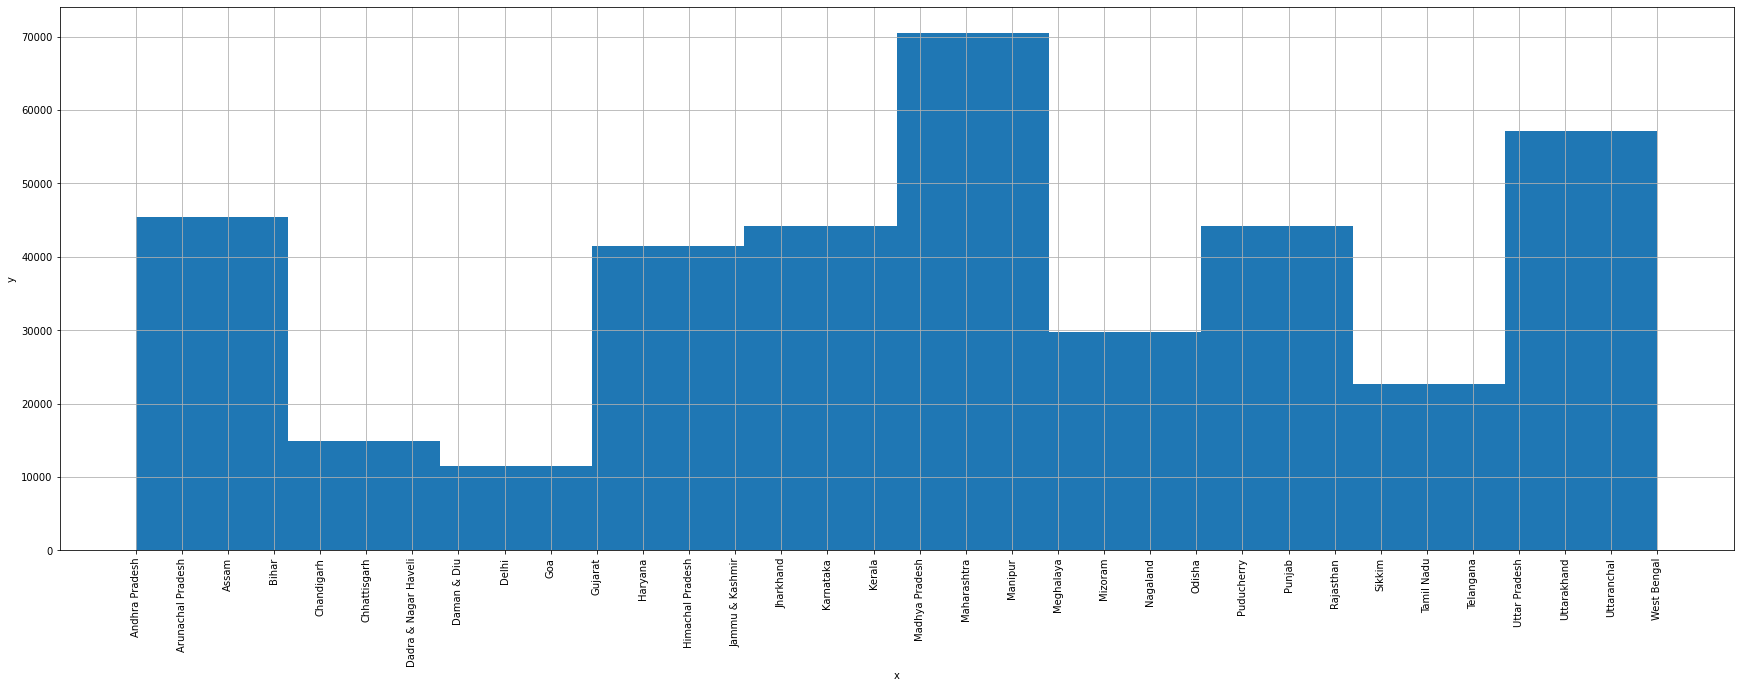

In [16]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90)
df2.state.hist()
plt.xlabel('x')
plt.ylabel('y')
plt.plot()

Text(0, 0.5, 'so2')

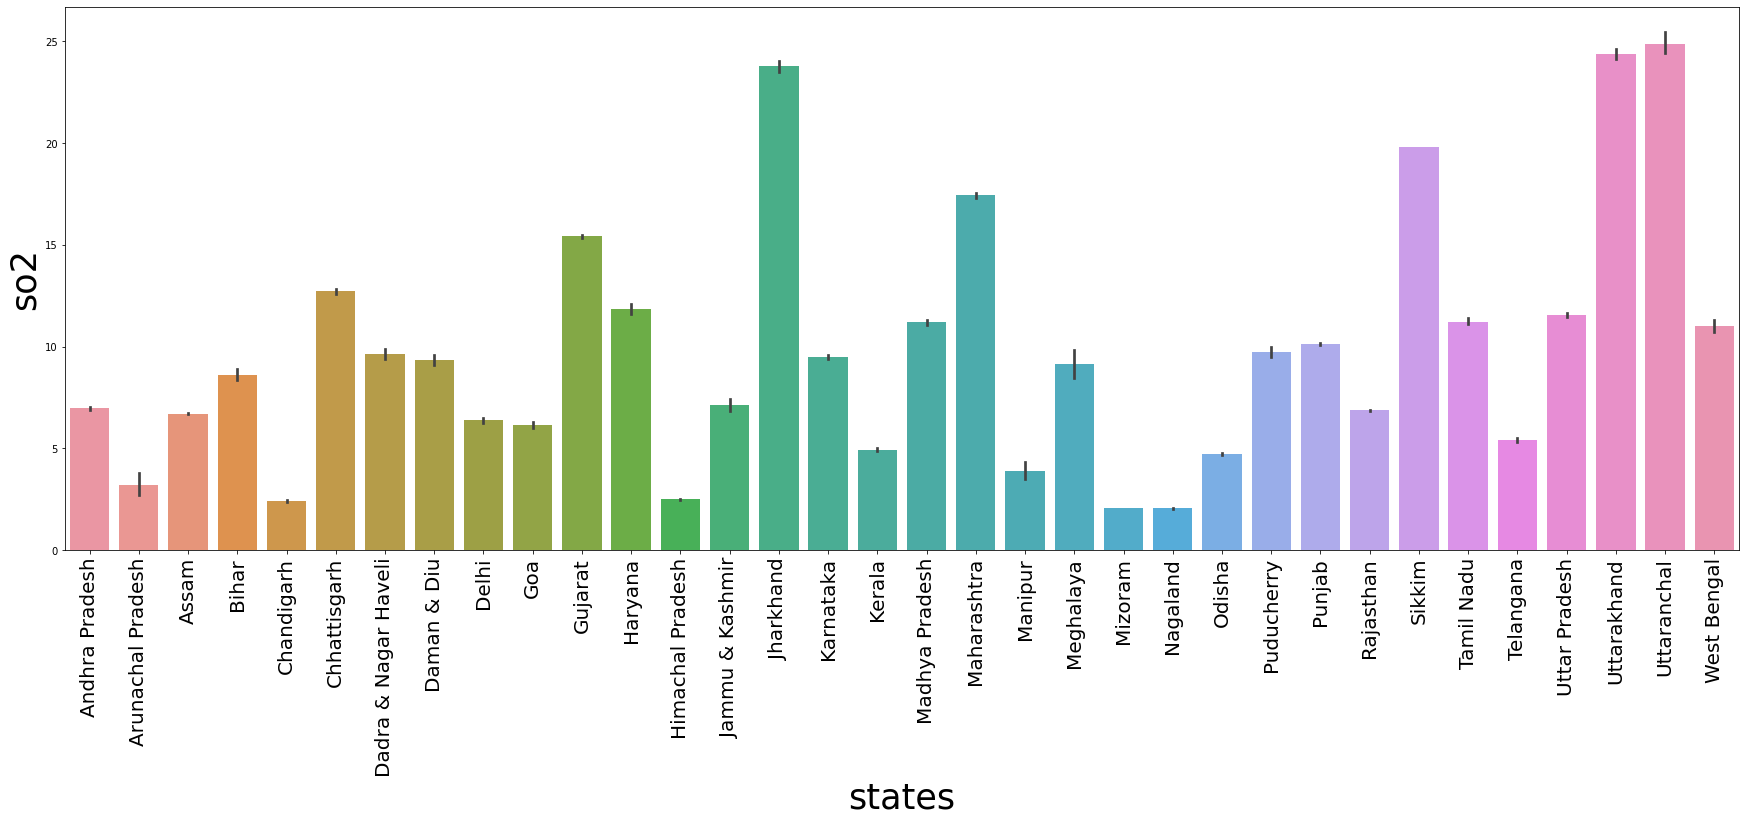

In [17]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90, fontsize = 20)
sns.barplot(x = 'state',y = 'so2',data = df2)
plt.xlabel('states',fontsize = 35)
plt.ylabel('so2',fontsize=35)

Text(0, 0.5, 'no2')

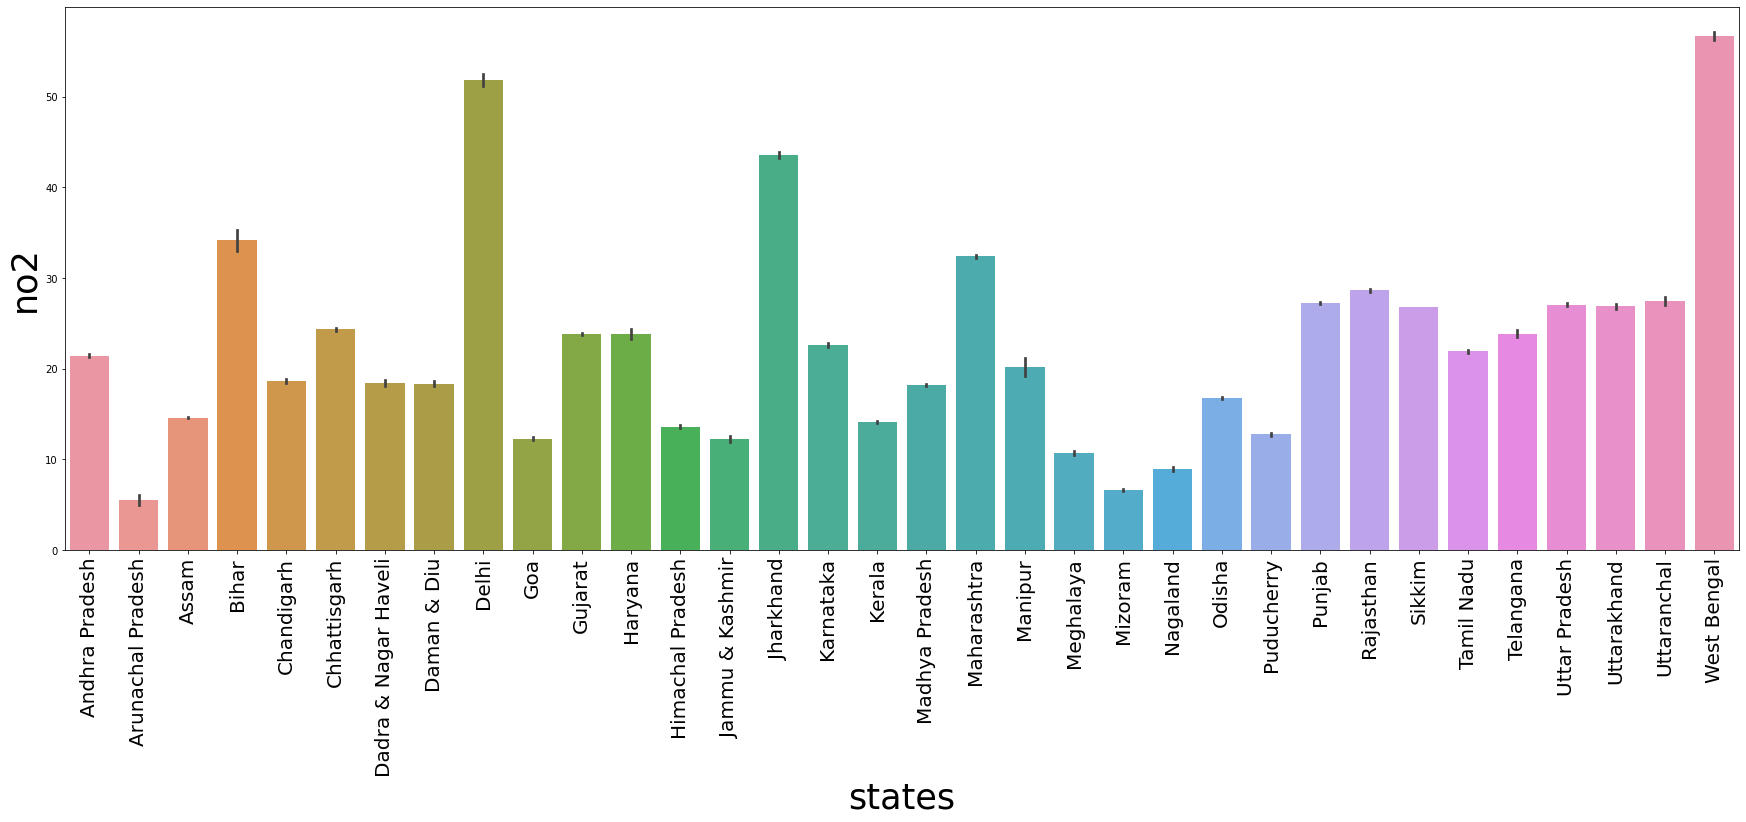

In [18]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90, fontsize = 20)
sns.barplot(x = 'state',y = 'no2',data = df2)
plt.xlabel('states',fontsize = 35)
plt.ylabel('no2',fontsize=35)

Text(0, 0.5, 'rspm')

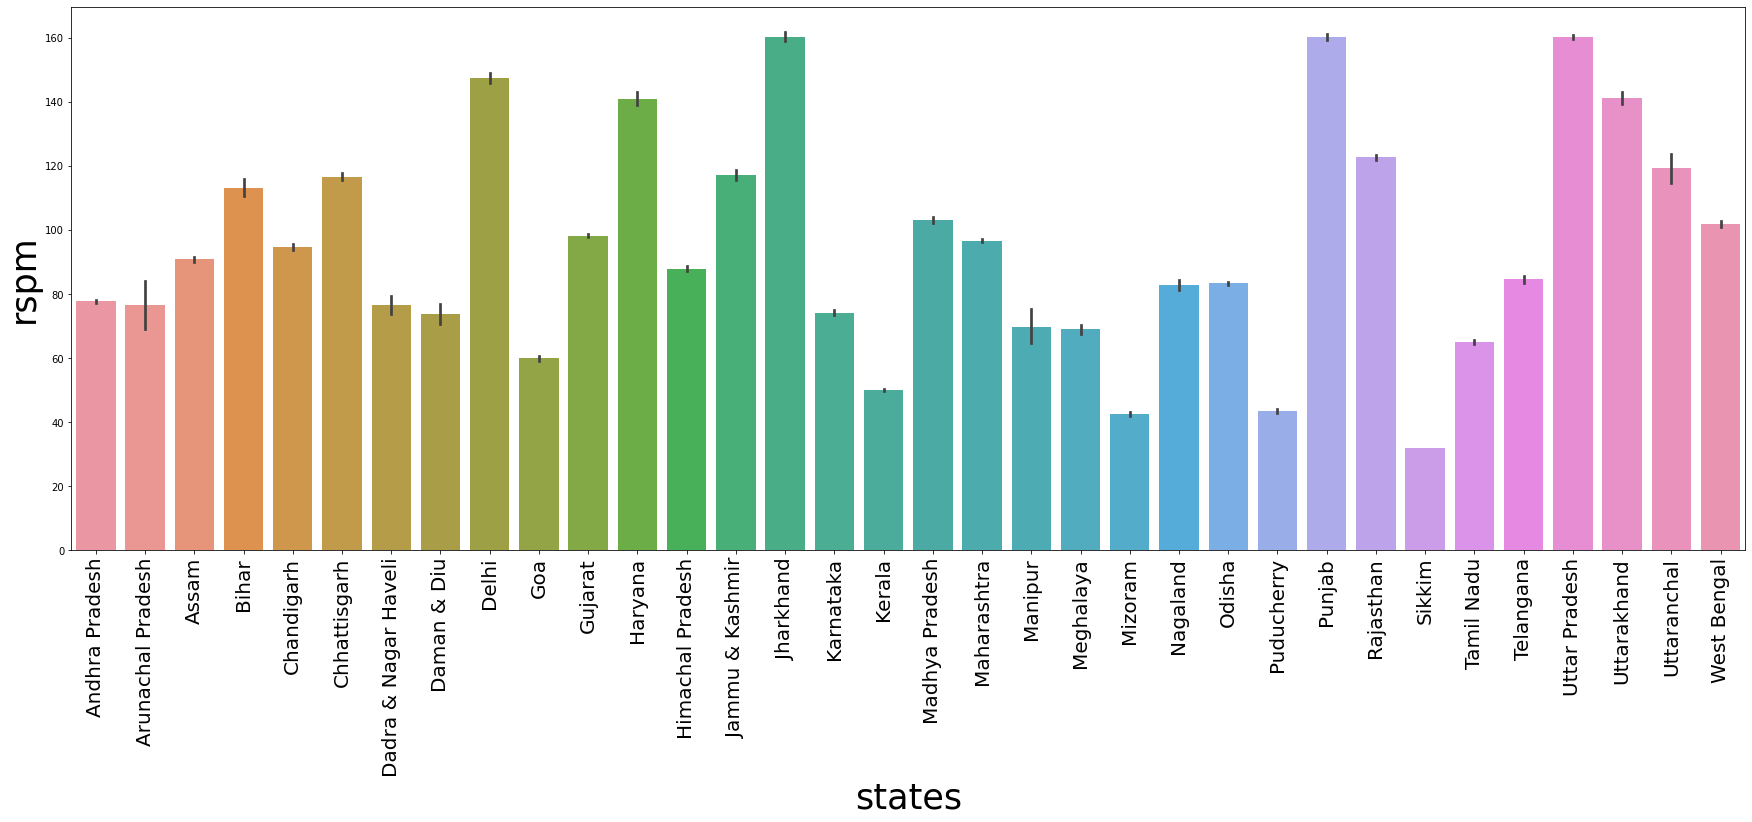

In [19]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90, fontsize = 20)
sns.barplot(x = 'state',y = 'rspm',data = df2)
plt.xlabel('states',fontsize = 35)
plt.ylabel('rspm',fontsize=35)

Text(0, 0.5, 'spm')

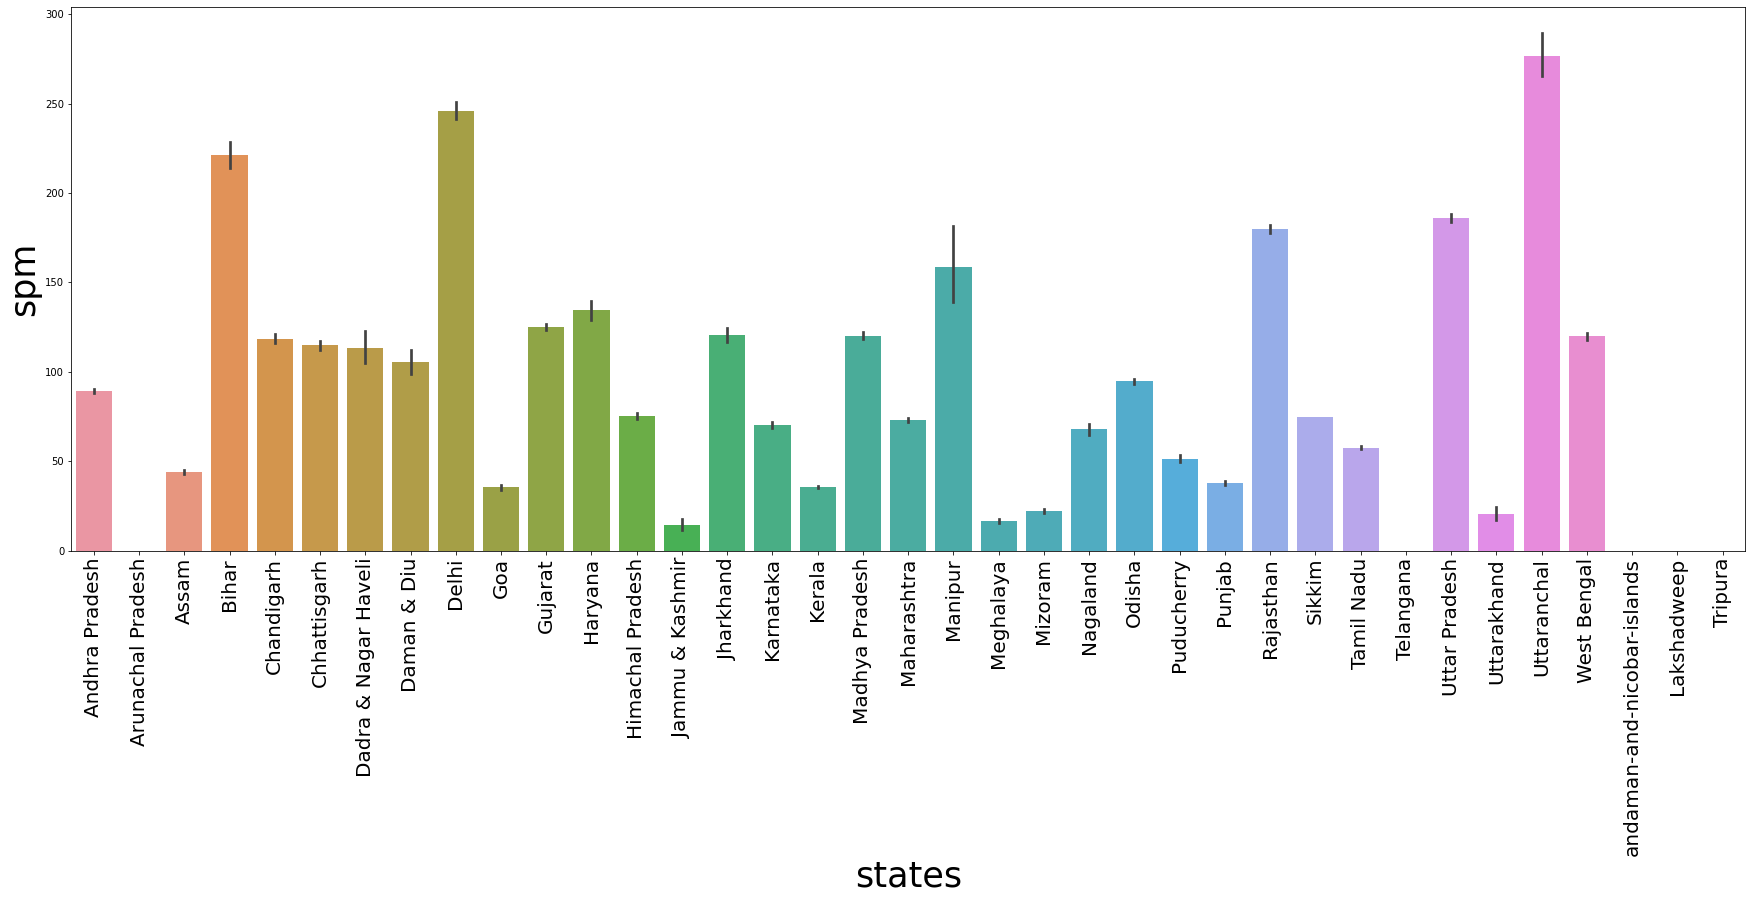

In [25]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90, fontsize = 20)
sns.barplot(x = 'state',y = 'spm',data = df2)
plt.xlabel('states',fontsize = 35)
plt.ylabel('spm',fontsize=35)

In [20]:
plt.rcParams['figure.figsize']=(30,10)

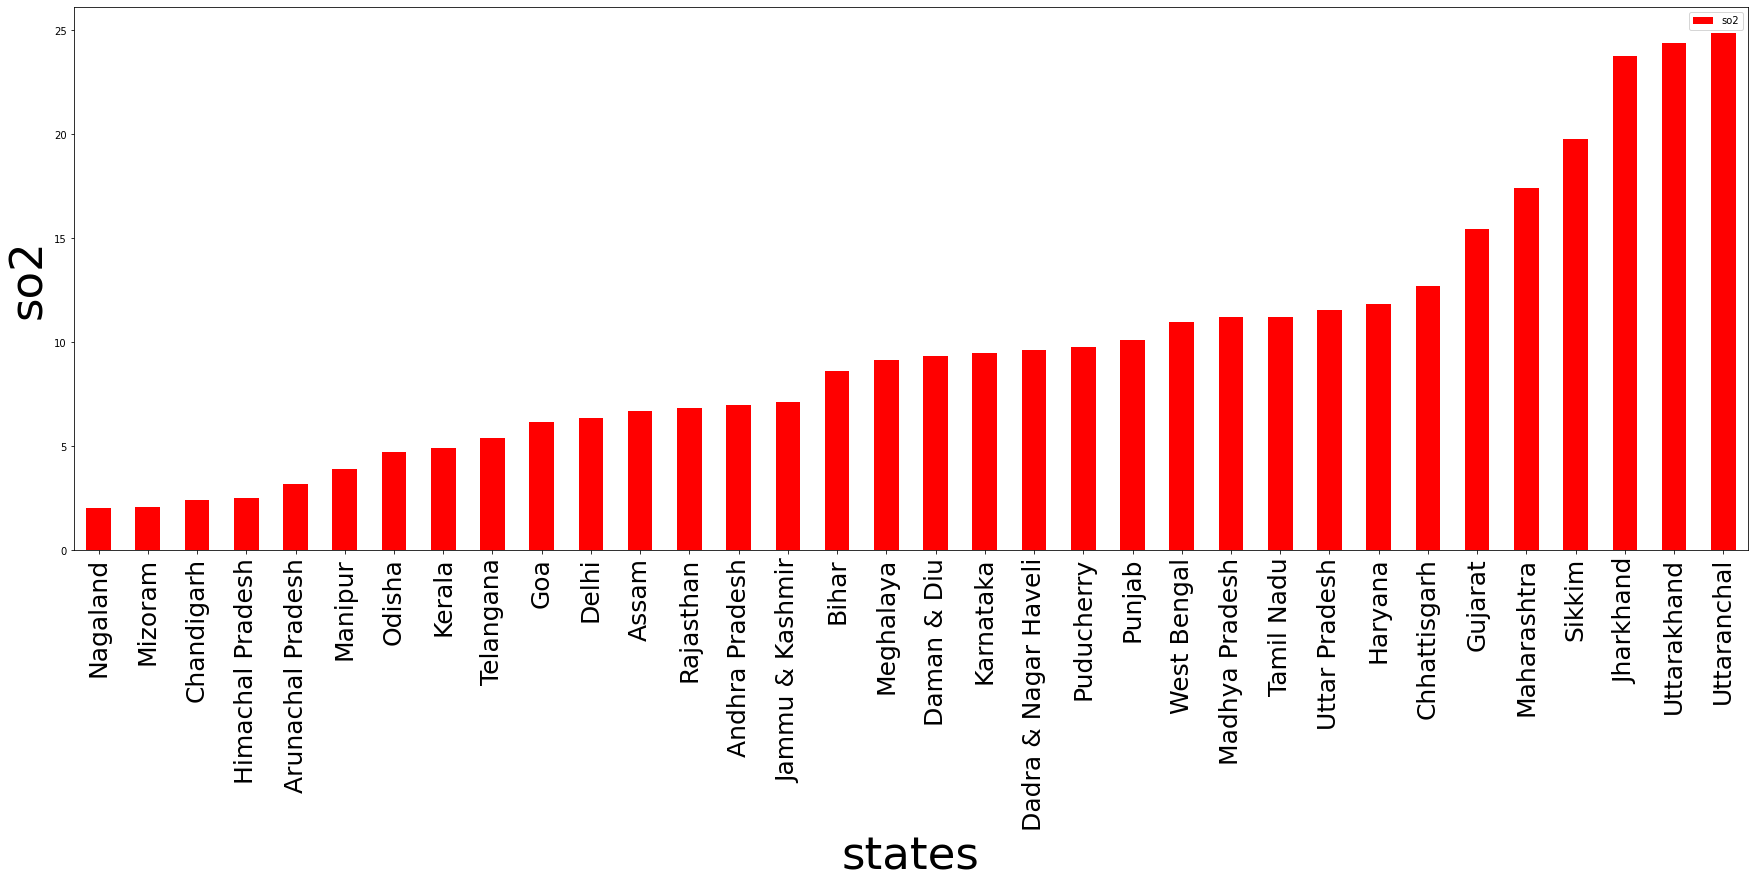

In [21]:
df2[['so2','state']].groupby('state').mean().sort_values(by = 'so2').plot.bar(color='red')
plt.xticks(fontsize = 25)
plt.xlabel('states',fontsize = 45)
plt.ylabel('so2',fontsize = 45)
plt.show()

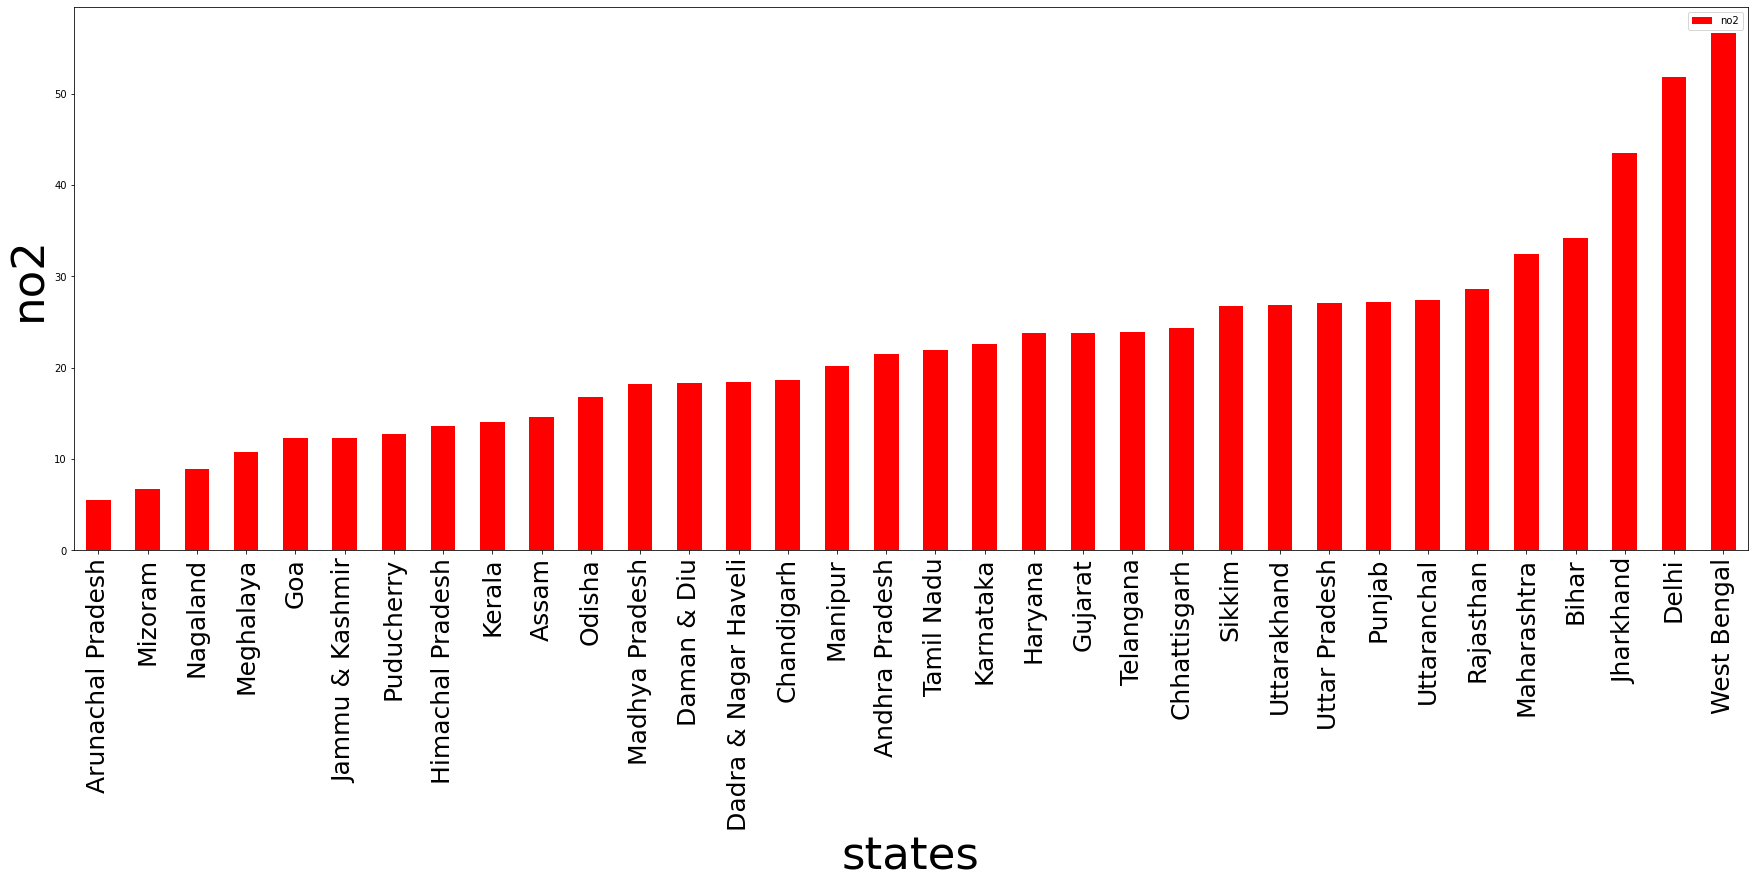

In [22]:
df2[['no2','state']].groupby('state').mean().sort_values(by = 'no2').plot.bar(color='red')
plt.xticks(fontsize = 25)
plt.xlabel('states',fontsize = 45)
plt.ylabel('no2',fontsize = 45)
plt.show()

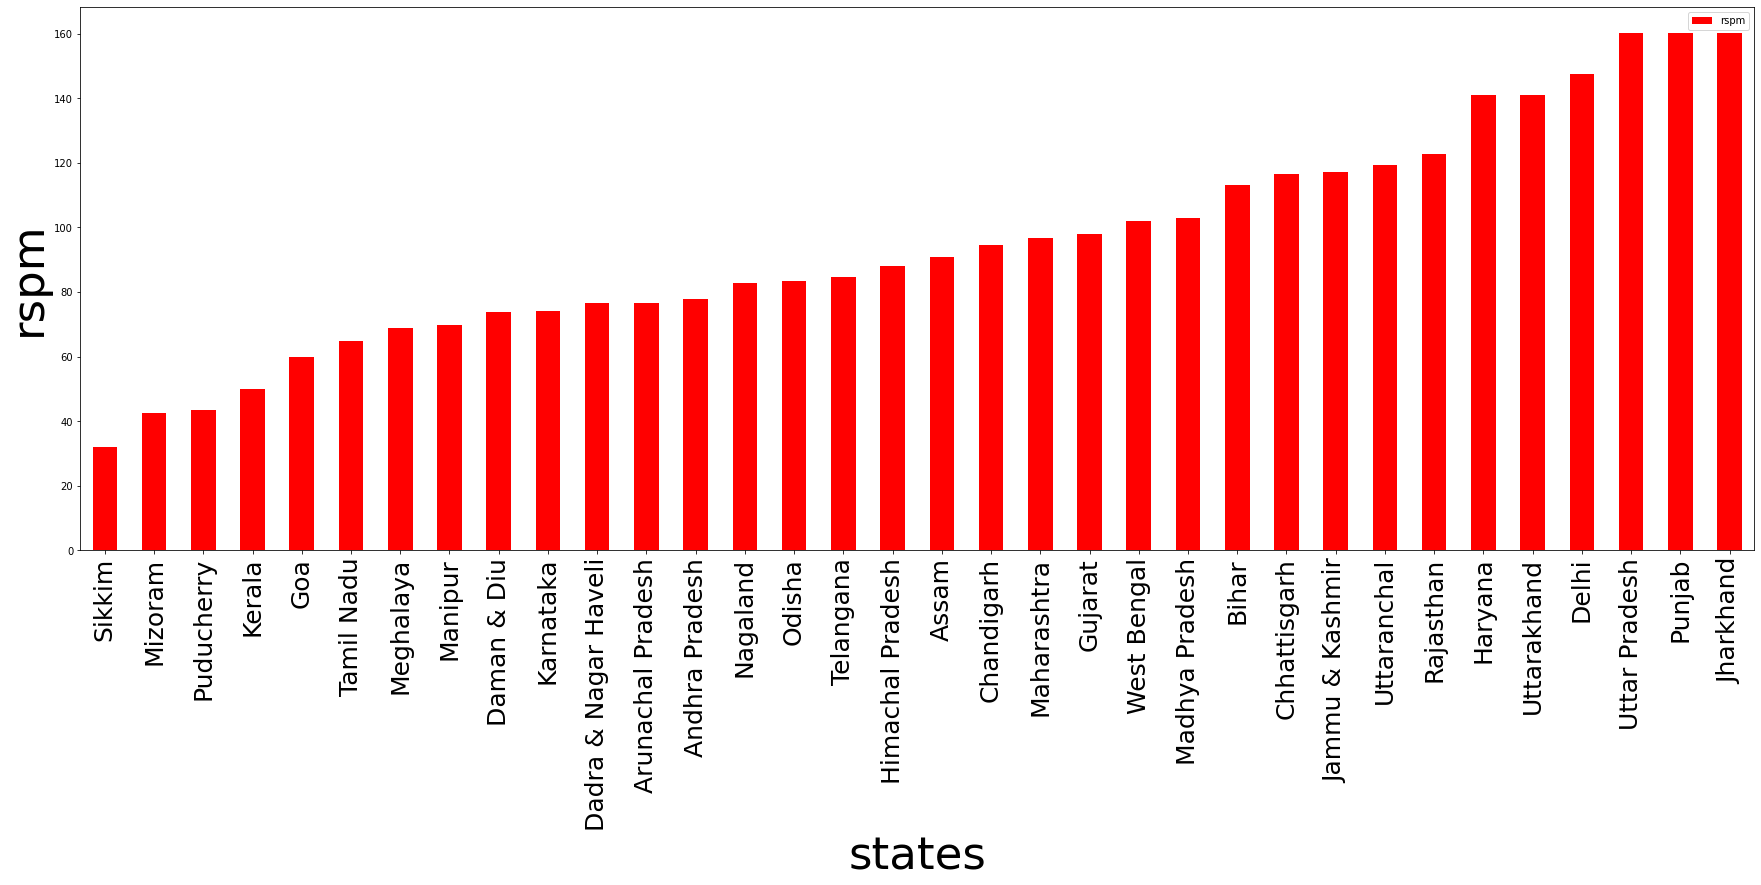

In [23]:
df2[['rspm','state']].groupby('state').mean().sort_values(by = 'rspm').plot.bar(color='red')
plt.xticks(fontsize = 25)
plt.xlabel('states',fontsize = 45)
plt.ylabel('rspm',fontsize = 45)
plt.show()

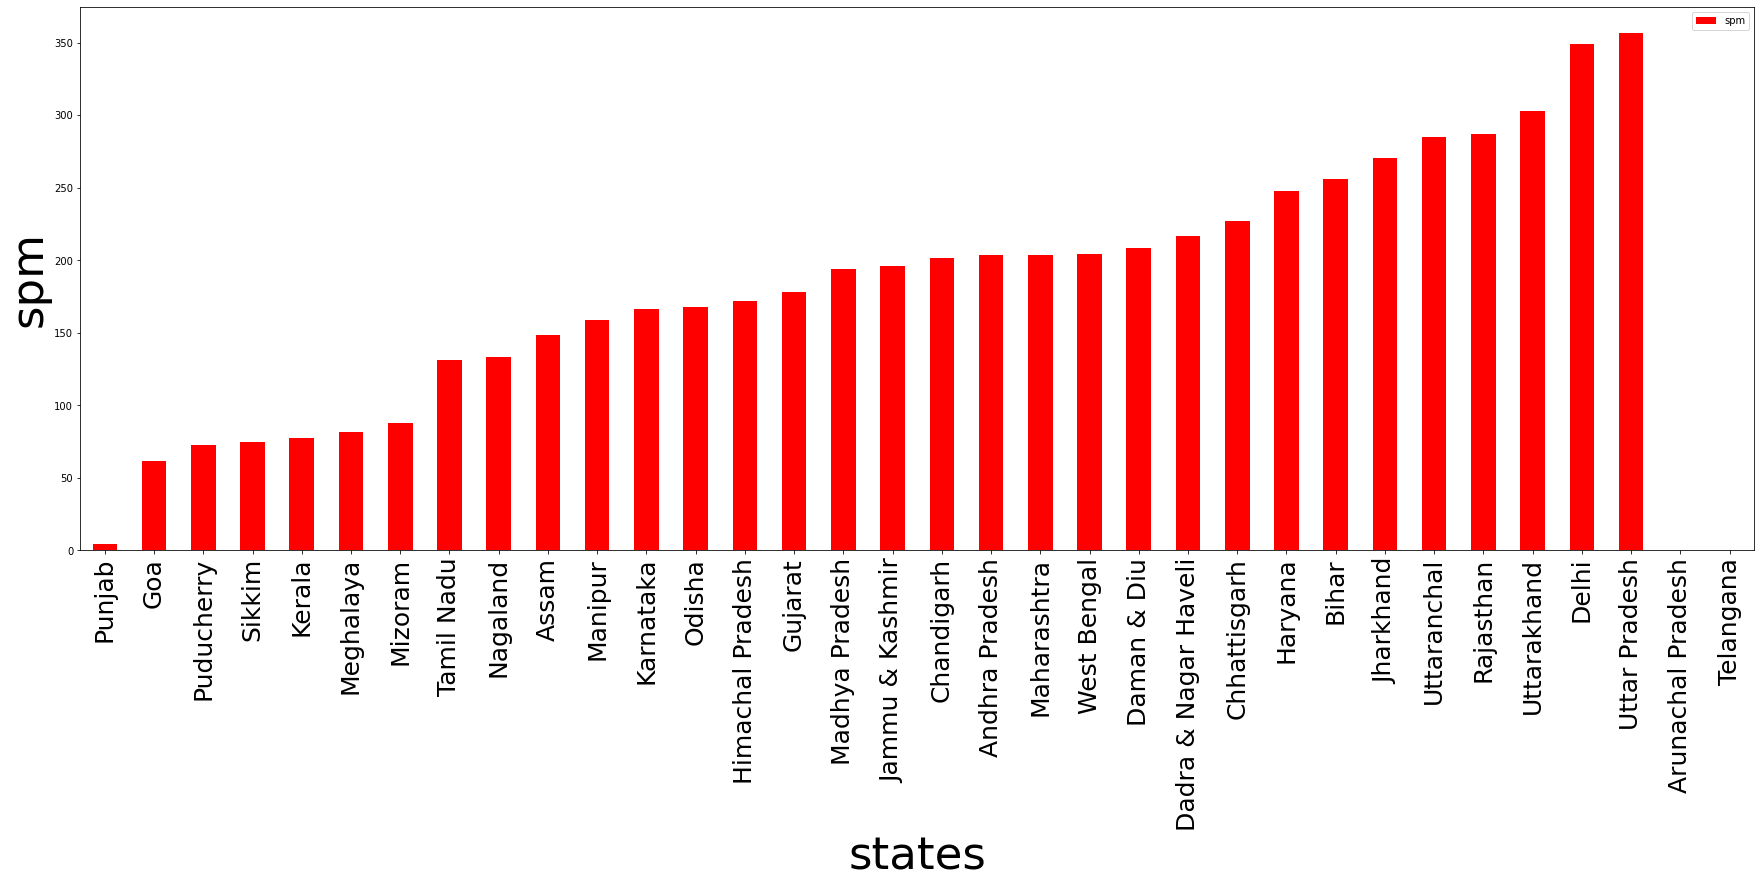

In [24]:
df2[['spm','state']].groupby('state').mean().sort_values(by = 'spm').plot.bar(color='red')
plt.xticks(fontsize = 25)
plt.xlabel('states',fontsize = 45)
plt.ylabel('spm',fontsize = 45)
plt.show()

In [25]:
def cal_soi(so2):
    si = 0
    if(so2<=40):
        si = so2*(50/40)
    elif(so2>40 and so2<=80):
        si = 50 + (so2-40)*(50/40)
    elif(so2>80 and so2<=380):
        si = 100 + (so2-80)*(100/300)
    elif(so2>380 and so2<=800):
        si = 200 + (so2-380)*(100/420)
    elif(so2>800 and so2<=1600):
        si = 300+(so2-800)*(100/800)
    return si
df2['soi'] = df2['so2'].apply(cal_soi)
df2[['soi','so2']].head

C:\Users\Dell\AppData\Local\Temp/ipykernel_11332/2375535158.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['soi'] = df2['so2'].apply(cal_soi)


<bound method NDFrame.head of            soi   so2
1036    16.125  12.9
1037    13.000  10.4
1038     9.500   7.6
1039     9.125   7.3
1040     8.500   6.8
...        ...   ...
435734  25.000  20.0
435735  21.250  17.0
435736  22.500  18.0
435737  27.500  22.0
435738  25.000  20.0

[381808 rows x 2 columns]>

In [26]:
def cal_noi(no2):
    ni = 0
    if(no2<=40):
        ni = no2*(50/40)
    elif(no2>40 and no2<=80):
        ni = 50 + (no2-40)*(50/40)
    elif(no2>80 and no2<=180):
        ni = 100 + (no2-80)*(100/100)
    elif(no2>180 and no2<=280):
        ni = 200 + (no2-180)*(100/100)
    elif(no2>280 and no2<=400):
        ni = 300+(no2-280)*(100/120)
    else:
        ni = 400+ (no2 - 400)*(100/120)
    return ni
df2['noi'] = df2['no2'].apply(cal_noi)
df2[['noi','no2']].head

C:\Users\Dell\AppData\Local\Temp/ipykernel_11332/83791899.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['noi'] = df2['no2'].apply(cal_noi)


<bound method NDFrame.head of             noi    no2
1036     69.750   55.8
1037     61.125   48.9
1038     62.625   50.1
1039     60.625   48.5
1040    130.300  110.3
...         ...    ...
435734   55.000   44.0
435735   55.000   44.0
435736   56.250   45.0
435737   62.500   50.0
435738   57.500   46.0

[381808 rows x 2 columns]>

In [27]:
def cal_roi(rspm):
    rpi = 0
    if(rspm<=30):
        rpi = rspm*(50/30)
    elif(rspm>30 and rspm<=60):
        rpi = 50 + (rspm-30)*(50/30)
    elif(rspm>60 and rspm<=90):
        rpi = 100 + (rspm-80)*(100/30)
    elif(rspm>90 and rspm<=120):
        rpi = 200 + (rspm-90)*(100/30)
    elif(rspm>120 and rspm<=250):
        rpi = 300+(rspm-120)*(100/130)
    else:
        rpi = 400+ (rspm - 250)*(100/130)
    return rpi
df2['roi'] = df2['rspm'].apply(cal_roi)
df2[['roi','rspm']].head

C:\Users\Dell\AppData\Local\Temp/ipykernel_11332/96836239.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['roi'] = df2['rspm'].apply(cal_roi)


<bound method NDFrame.head of                roi   rspm
1036    318.230769  143.7
1037    303.615385  124.7
1038    126.666667   88.0
1039    109.000000   82.7
1040    301.769231  122.3
...            ...    ...
435734  321.538462  148.0
435735  308.461538  131.0
435736  315.384615  140.0
435737  317.692308  143.0
435738  339.230769  171.0

[381808 rows x 2 columns]>

In [28]:
def cal_spmi(spm):
    spi = 0
    if(spm<=50):
        spi = spm*(50/50)
    elif(spm>50 and spm<=100):
        spi = 50 + (spm-50)*(50/50)
    elif(spm>100 and spm<=250):
        spi = 100 + (spm-100)*(100/150)
    elif(spm>250 and spm<=350):
        rpi = 200 + (spm-250)*(100/100)
    elif(spm>350 and spm<=430):
        spi = 400+(spm-430)*(100/430)
    
    return spi
df2['spi'] = df2['spm'].apply(cal_spmi)
df2[['spi','spm']].head

C:\Users\Dell\AppData\Local\Temp/ipykernel_11332/2670268885.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['spi'] = df2['spm'].apply(cal_spmi)


<bound method NDFrame.head of                spi    spm
1036    386.209302  370.7
1037      0.000000  285.7
1038    180.866667  221.3
1039    157.800000  186.7
1040      0.000000  270.7
...            ...    ...
435734    0.000000    NaN
435735    0.000000    NaN
435736    0.000000    NaN
435737    0.000000    NaN
435738    0.000000    NaN

[381808 rows x 2 columns]>

In [29]:
def cal_aqi(si,ni,rpi,spi):
    aqi = 0
    if(si>ni and si>rpi and si>spi):
        aqi = si
    elif(ni>si and ni>rpi and ni>spi):
        aqi = ni
    elif(rpi>si and rpi>ni and rpi>spi):
        aqi = rpi
    elif(spi>si and spi>rpi and spi>ni):
        aqi = spi
    return aqi
df2 = df2.assign(aqi=df2.apply(lambda x: cal_aqi(x['soi'],x['noi'],x['roi'],x['spi']), axis=1))
df3 = df2[['state','soi','noi','roi','spi','aqi']]
df3.head()

,state,soi,noi,roi,spi,aqi
1036,Andhra Pradesh,16.125,69.750,318.230769,386.209302,386.209302
1037,Andhra Pradesh,13.000,61.125,303.615385,0.000000,303.615385
1038,Andhra Pradesh,9.500,62.625,126.666667,180.866667,180.866667
1039,Andhra Pradesh,9.125,60.625,109.000000,157.800000,157.800000
1040,Andhra Pradesh,8.500,130.300,301.769231,0.000000,301.769231


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [31]:
df3.columns

Index(['state', 'soi', 'noi', 'roi', 'spi', 'aqi'], dtype='object')

In [32]:
x = df3[['soi','noi','roi','spi']]
y = df3['aqi']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 50)

In [34]:
x_train.shape

(305446, 4)

In [35]:
x_test.shape

(76362, 4)

In [36]:
linear = LinearRegression()
logistic = LogisticRegression()
random = RandomForestRegressor()
decision = DecisionTreeRegressor()

In [37]:
lr_param = {'fit_intercept':[5,10,15],'n_jobs':[5,10,15]}
rf_param = {'n_estimators':[5,10,15],'max_depth':[5,10,15]}
dt_param = {'max_depth':[10,20,30],'max_features':[5,10,15]}

In [38]:
lr_grid = GridSearchCV(linear,lr_param,cv=5)
rt_grid = GridSearchCV(random,rf_param,cv=5)
dt_grid = GridSearchCV(decision,dt_param,cv=5)

In [39]:
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': [5, 10, 15]})

In [43]:
rt_grid.fit(x_train,y_train)

ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    X, y = self._validate_data(
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [41]:
lr_grid.fit(x_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymo

ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py", line 678, in fit
    X, y = self._validate_data(
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 959, in check_array
    _assert_all_finite(
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [44]:
print('DECISION TREE =',dt_grid.score(x_test,y_test))

DECISION TREE = 0.7933808268610386


In [45]:
dt_grid.predict([[6.000,8.750,0.0,0.0]])

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([87.57236513])

In [46]:
y_pred = dt_grid.predict(x_test)

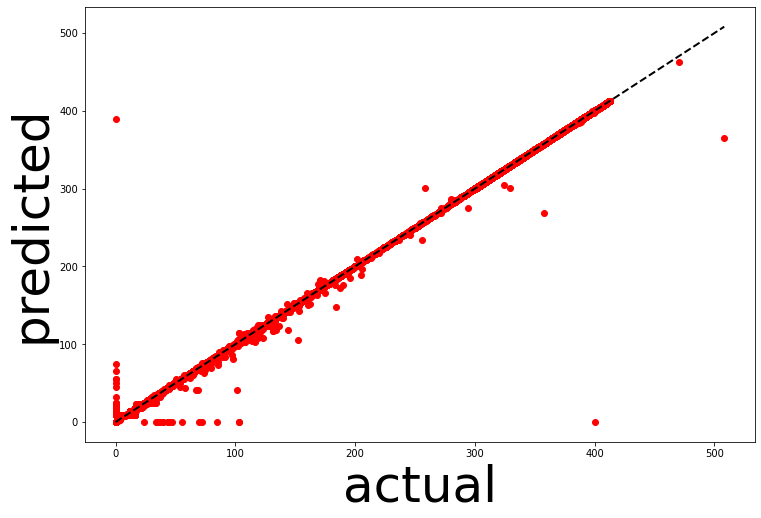

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_test,y_pred,cmap='cividis',color='red')
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
ax.set_xlabel('actual',fontsize = 50)
ax.set_ylabel('predicted',fontsize = 50)
plt.show()

In [52]:
x_train.head(5)

,soi,noi,roi,spi
265562,2.50,6.25,78.333333,0.0
182281,31.50,46.75,100.000000,0.0
72738,2.50,98.75,260.000000,0.0
153689,11.75,14.50,0.000000,46.0
52410,2.50,35.00,363.846154,0.0


In [ ]:
import joblib

In [83]:
joblib.dump(dt_grid,'air_quality_model.joblib')

['air_quality_model.joblib']

In [85]:
import os
print(os.getcwd())

C:\Users\Dell\Desktop\Untitled Folder


In [47]:
import pickle

In [48]:
pickle.dump(dt_grid,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))